<h1>Seonsory Dissonance (Roughness)</h1>
<h2>MUS14.01/102 Week 1</h2> 
<h2>Prof. Casey, Dartmouth College, Department of Music</h2>

In this lab you will:

1. learn how to calculate sensory dissonance between two tones
2. use a dissonance function to compare spectra with different overtones
3. use a dissonance function to analyze works of J. S. Bach

<h2>A Dissonance Function</h2>

Following is a function for computing sensory dissonance between a set of frequency components optinally weighted by their relative amplitudes. This function implements William Sethares' algorithm from his 1998 book "Tuning, Timbre, Spectrum, Scale". 

Execute the cell by selecting it and pressing "Shift Enter". Now the function will be in the notebook's workspace. The function uses the numerical computing library numpy, and we import all of it into the current workspace with an import statement. 

In [1]:
from pylab import * # import matlab-like plotting and numerical functions
%matplotlib inline 

def dissonance(freqs, amps=None, params=None):
    """                                                                                                                             
    Compute dissonance between partials with center frequencies in freqs, uses a model of critical bandwidth.                                                     
    and amplitudes in amps. Based on Sethares "Tuning, Timbre, Spectrum, Scale" (1998) after Plomp and Levelt (1965)                                                 
    
    inputs:
        freqs - list of partial frequencies
        amps - list of corresponding amplitudes [default, uniformly 1]
    """
    if params == None: params = (-3.51, -5.75, 0.0207, 19.96, 5, -5, 0.24)
    b1, b2, s1, s2, c1, c2, Dstar  = params
    f = array(freqs).flatten() # flatten to cope with lists of lists
    if amps is None: amps = [1]*len(f)
    a = array(amps).flatten()
    idx = argsort(f)
    f = f[idx]
    a = a[idx]
    N = f.size
    D = 0
    for i in range(1, N):
        Fmin = f[ 0 : N - i ]
        S = Dstar / ( s1 * Fmin + s2)
        Fdif = f[ i : N ] - f[ 0 : N - i ]
        am = a[ i : N ] * a[ 0 : N - i ]
        Dnew = am * (c1 * exp (b1 * S * Fdif) + c2 * exp(b2 * S * Fdif))
        D += Dnew.sum()
    return D

<h2>Simple Tones (1 sinusoid each tone)</h2>

In [2]:
f0 = 440 # This is the frequency of 'concert A'

# To use the dissonance function, we supply a list of frequencies
# Here, we use f0 and 2*f0, corresponding to two frequency components an octave apart
dissonance( [f0, 2*f0] )

# The answer should be close to zero, since an octave is a consonant pitch interval (but not zero, because that is reserved for the unison)

1.4487908580753865e-05

In [3]:
# Calculate the dissonance function for the interval of a perfect fifth, which is 3/2 or 1.5 * f0
dissonance( [f0, 1.5*f0] )

0.0083668433347787868

In [4]:
# Calculate dissonance for 12 equal-temperament tuning frequencies in the range of an octave
ratios = logspace(0, log10(2), 24) # Generates a list of equal-temperament frequency ratios 
print ratios

[ 1.          1.03059554  1.06212718  1.09462354  1.12811414  1.16262941
  1.19820069  1.23486029  1.27264151  1.31157867  1.35170714  1.39306335
  1.43568489  1.47961045  1.52487993  1.57153447  1.61961642  1.66916947
  1.72023862  1.77287025  1.82711218  1.88301368  1.94062551  2.        ]


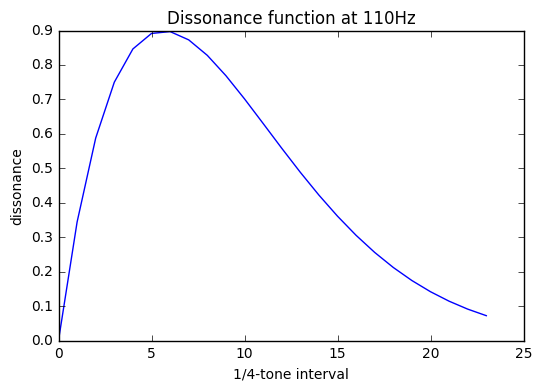

In [5]:
# Now apply the dissonacne function for each of the quarter-tone equal temperament ratios 
# for a fundamental frequency of 55Hz
f0 = 110 # Fundamental Frequency
plot( [dissonance([f0, f0*r]) for r in ratios] ) # plot dissonance for pair-wise tones between f0 and all ratios
xlabel('1/4-tone interval')
ylabel('dissonance')
t=title('Dissonance function at %dHz'%f0)

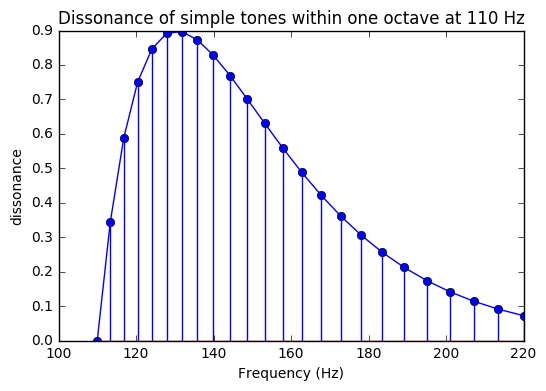

In [6]:
# Capture the output as a list and plot the result
f0 = 110 
curve = [dissonance([f0, f0*r]) for r in ratios]

# Plot the dissonance curve
freqs = f0 * ratios
plot(freqs, curve)
stem(freqs, curve)
title('Dissonance of simple tones within one octave at %d Hz'%f0)
xlabel('Frequency (Hz)')
ylabel('dissonance')


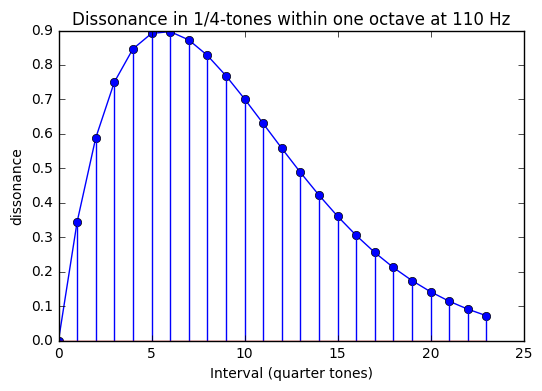

In [7]:
# The x-axis above was in frequency
# Let's see that again, but as musical intervals
# The intervals are 1/4 tones within an octave (2 x 1/4 tone = 1/2 step)
f0 = 110 
curve = [dissonance([f0, f0*r]) for r in ratios]

intervals = arange(24)
plot(intervals, curve)
stem(intervals, curve)
xlabel('Interval (quarter tones)')
ylabel('dissonance')
t=title('Dissonance in 1/4-tones within one octave at %d Hz'%f0)

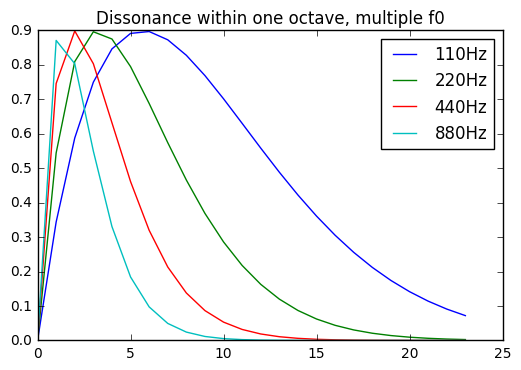

In [8]:
# Now, let's plot the same curve at different frequencies

for f0 in [110, 220, 440, 880]:
    curve = [dissonance([f0, f0*r]) for r in ratios]
    plot(curve)
legend(['110Hz','220Hz','440Hz','880Hz'])
t=title('Dissonance within one octave, multiple f0')

<h2>Complex Tones (Multiple sinsusoids each tone)</h2>

Dissonance = 0.000233076972109


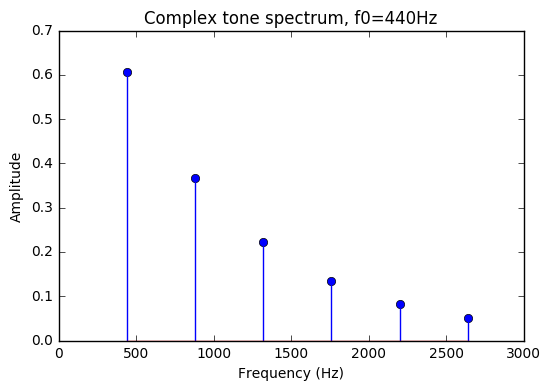

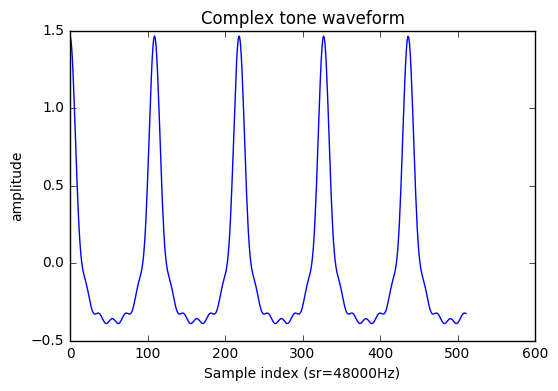

In [9]:
# Compute the dissonance for a tone with 6 harmonics 
# This sums all of the dissonances within the tone
f0 = 440
freqs0 = arange(1,7) * f0 # six harmonics beginning at f0
amps0 = exp(-0.5*arange(1,7))

stem(freqs0, amps0)
title('Complex tone spectrum, f0=%dHz'%f0)
xlabel('Frequency (Hz)')
ylabel('Amplitude')
print "Dissonance =", dissonance(freqs0, amps0)

# Plot the waveform corresponding to this spectrum (assume zero-phase)
figure()
x = zeros(512)
for f,a in zip(freqs0, amps0):
    x += a*cos(2*pi*f*arange(512)/48000.0)
plot(x)
xlabel('Sample index (sr=48000Hz)')
ylabel('amplitude')
t=title('Complex tone waveform')

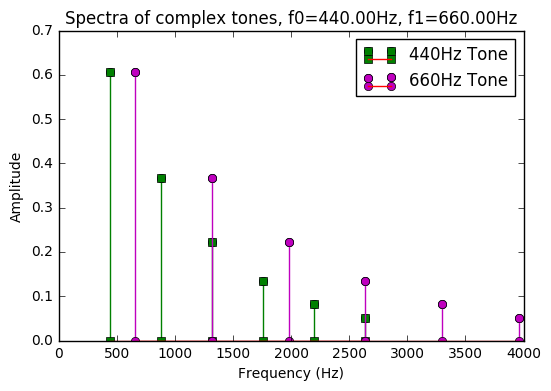

In [10]:
# Make a second complex tone at the interval of a fifth from the first
# And plot the spectra of the two tones
f1 = f0 * 1.5 # A Perfect fifth
freqs1 = arange(1,7) * f1 # six harmonics beginning at f0
amps1 = exp(-0.5*arange(1,7))

stem(freqs0,amps0,'gs-') # Colored stem plots
stem(freqs1,amps1,'mo-')
xlabel('Frequency (Hz)')
ylabel('Amplitude')
legend(['440Hz Tone','660Hz Tone'])
t=title('Spectra of complex tones, f0=%.2fHz, f1=%.2fHz'%(f0,f1))

In [11]:
# Compute the dissonance between the two tones f0 and f1 (with amplitudes freqs1 and amps1)
dissonance([freqs0, freqs1],[amps0, amps1])

0.016817618138729156

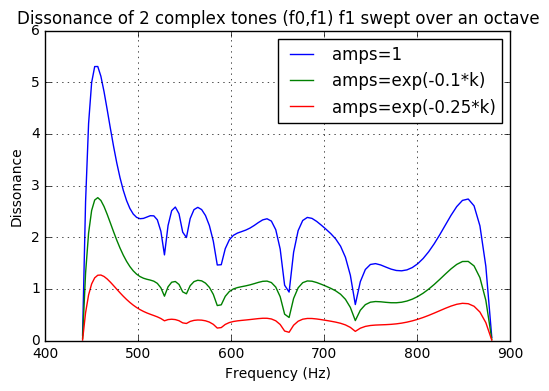

In [24]:
# Compute dissonance between two complex tones with fundamental frequencies f0 and f1 
# for a sweep of the upper tone over an octave

ratios = logspace(0, log10(2), 96) # sixteenth-tone frequency ratio spacing (for better resolution)
df = [dissonance([freqs0, arange(1,7)*f0*r]) for r in ratios]
plot(f0*ratios,df)
grid()
xlabel('Frequency (Hz)')
ylabel('Dissonance')

# Plot with exponentially weight amplitudes
amps2 = exp(-0.1*arange(1,7))
df2 = [dissonance([freqs0, arange(1,7)*f0*r],[amps2,amps2]) for r in ratios]
plot(f0*ratios,df2)

amps3 = exp(-0.25*arange(1,7))
df3 = [dissonance([freqs0, arange(1,7)*f0*r],[amps3,amps3]) for r in ratios]
plot(f0*ratios,df3)

legend(['amps=1','amps=exp(-0.1*k)','amps=exp(-0.25*k)'])
t = title('Dissonance of 2 complex tones (f0,f1) f1 swept over an octave')


<h3>QUESTION 1. Dissonance of Complex Tones</h3>

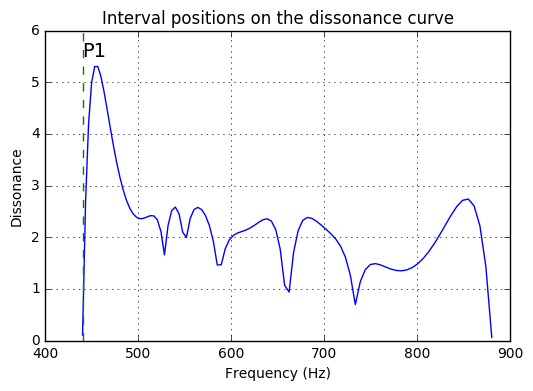

In [35]:
# Label the positions of intervals M2, M3, P4, P5, M6, M7, and P8 on the following graph
ratios = logspace(0, log10(2), 96) # sixteenth-tone frequency ratio spacing (for better resolution)
df = [dissonance([freqs0, arange(1,7)*f0*r]) for r in ratios]
plot(f0*ratios,df)
grid()
xlabel('Frequency (Hz)')
ylabel('Dissonance')

# HINT: Here is the label for the first interval (Unison: f1 = 1*f0
plot([1*f0,1*f0],[0,6],'--') # Make a dashed vertical line
text(1*f0, 5.5, 'P1', fontsize=14) # Write a text label

# COMPLETE FOR ALL 7 INTERVALS M2, M3, P4, P5, M6, M7, and P8 
# Use the hint on the two lines above.



t=title('Interval positions on the dissonance curve')

<h2>Dissonance in a Musical Score</h2>
<h3>Use of Dissonance in Book 1 of Bach's Well-Tempered Clavier</h3>